In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df.drop(df.columns[0], axis=1, inplace=True, errors='ignore')
df.dropna(inplace=True)


In [34]:
print(df.columns)
df.columns = df.columns.str.strip()
if 'price(L)' in df.columns:
    df['price(L)'] = pd.to_numeric(df['price(L)'], errors='coerce')
else:
    print("Column 'price(L)' does not exist.")
df['price(L)'] = pd.to_numeric(df.get('price(L)', pd.Series()), errors='coerce')


Index(['rate_persqft', 'area_insqft', 'building_status', 'price_per_sqft',
       'bedrooms'],
      dtype='object')
Column 'price(L)' does not exist.


In [ ]:
# Avg price by property type
prop_type_price = df.groupby('title')['price(L)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
prop_type_price.plot(kind='bar')
plt.title('Average Price by Property Type')
plt.ylabel('Price in Lakhs')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Price comparison by building status
status_price = df.groupby('building_status')['price(L)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
status_price.plot(kind='bar')
plt.title('Average Price by Building Status')
plt.ylabel('Price in Lakhs')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Correlation matrix
corr_matrix = df[['price(L)', 'area_insqft', 'rate_persqft', 'bedrooms']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Top 10 locations by price per sqft
top_pps = df.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_pps.plot(kind='bar')
plt.title('Average Price per Sqft by Location (Top 10)')
plt.ylabel('Price per Sqft (₹)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Price distribution by BHK
plt.figure(figsize=(12,6))
sns.boxplot(x='bedrooms', y='price(L)', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Lakhs')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform X
X = df[['area_insqft', 'bedrooms']]
X = imputer.fit_transform(X)  # Now X is a numpy array without NaNs

y = df['price(L)'].dropna()  # Also make sure y has no NaNs
X = X[:len(y)]  # Align X and y if needed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")


R2 Score: 0.508258840260082
RMSE: 153.6815049640998


Random Forest R2 Score: 0.5578
Random Forest RMSE: 129.5782


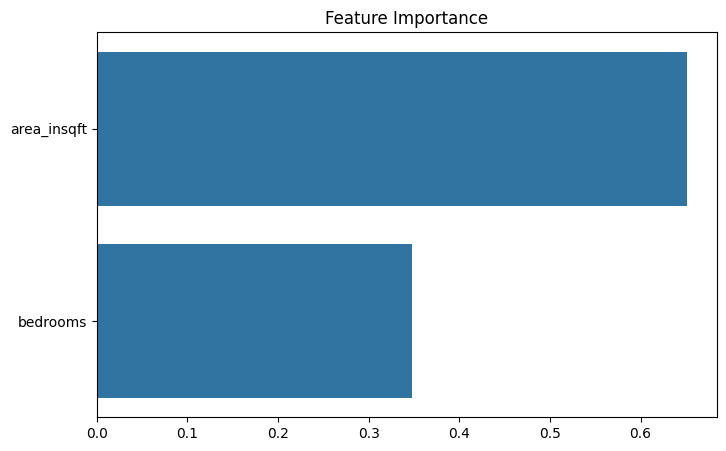

In [ ]:
# Make sure X and y are aligned
y = y[:len(X)]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Random Forest R2 Score: {r2:.4f}")
print(f"Random Forest RMSE: {rmse:.4f}")

# Feature Importance (optional but useful)
features = ['area_insqft', 'bedrooms']
importances = model.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()